# Notes

In [26]:
import sys
sys.path.append('../src/')
import contextily as cx
import seaborn as sns


In [27]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.dengue_cases import Dengue
from data_sources.specific.malaria_cases_sivigila_4 import MalariaSivigila4
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal
from data_sources.specific.population import Population

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.colombian_departments import ColombianDepartments

from geography.specific.colombian_frontiers import ColombianFrontiers
from geography.specific.colombia_main_rivers import ColombianMainRivers
from geography.general.geography_from_flow_output import GeographyFromFlowOutput
from geography.specific.colombia_grid import ColombianGrid


pd.set_option('display.max_rows', 100)



In [28]:
df_geo = ColombianDepartments()
data = Population()
df = data.createData(df_geo=df_geo.get_geometry(), time_resolution=YEAR)
df

Loads Data
Builds Overlay
By Dates. From 1985 to 2035
   1985-12-31T00:00:00.000000000
   1986-12-31T00:00:00.000000000
   1987-12-31T00:00:00.000000000
   1988-12-31T00:00:00.000000000
   1989-12-31T00:00:00.000000000
   1990-12-31T00:00:00.000000000
   1991-12-31T00:00:00.000000000
   1992-12-31T00:00:00.000000000
   1993-12-31T00:00:00.000000000
   1994-12-31T00:00:00.000000000
   1995-12-31T00:00:00.000000000
   1996-12-31T00:00:00.000000000
   1997-12-31T00:00:00.000000000
   1998-12-31T00:00:00.000000000
   1999-12-31T00:00:00.000000000
   2000-12-31T00:00:00.000000000
   2001-12-31T00:00:00.000000000
   2002-12-31T00:00:00.000000000
   2003-12-31T00:00:00.000000000
   2004-12-31T00:00:00.000000000
   2005-12-31T00:00:00.000000000
   2006-12-31T00:00:00.000000000
   2007-12-31T00:00:00.000000000
   2008-12-31T00:00:00.000000000
   2009-12-31T00:00:00.000000000
   2010-12-31T00:00:00.000000000
   2011-12-31T00:00:00.000000000
   2012-12-31T00:00:00.000000000
   2013-12-31T00:00:00

,ID,date,rural_sum,total_sum,urban_sum
0,91,1985-12-31,27685,48998,21313
1,5,1985-12-31,1995009,5162558,3167549
2,81,1985-12-31,104516,225006,120490
3,88,1985-12-31,11567,41305,29738
4,8,1985-12-31,171780,1476307,1304527
...,...,...,...,...,...
1678,70,2035-12-31,1071288,3166432,2095144
1679,73,2035-12-31,1048448,4734951,3686503
1680,76,2035-12-31,1038035,6263819,5225784
1681,97,2035-12-31,101282,130659,29377


<AxesSubplot:xlabel='date', ylabel='total_sum'>

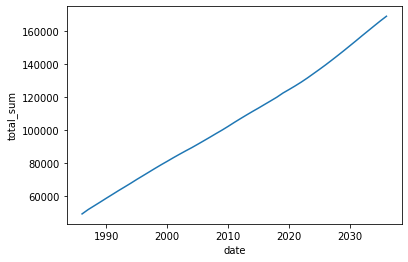

In [29]:
id = "91"
df_plot = df[df.ID == id]

sns.lineplot(data = df_plot, x = DATE, y = 'total_sum')

<AxesSubplot:xlabel='date', ylabel='num_cases_sum'>

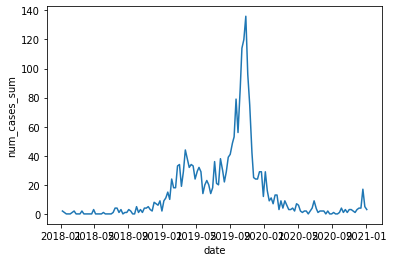

In [4]:
id = "91"
df_plot = df[df.ID == id]

sns.lineplot(data = df_plot, x = DATE, y = 'num_cases_sum')

<AxesSubplot:xlabel='date', ylabel='value'>

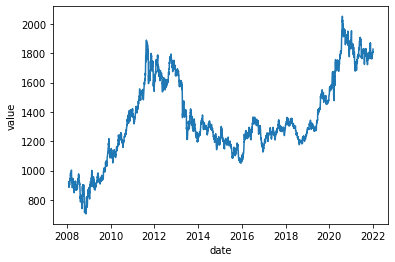

In [17]:
id = "91"
df_plot = df[df.ID == id]

sns.lineplot(data = df_plot, x = DATE, y = 'value')

In [8]:
df1 = pd.DataFrame({'a' : [1,None, None, 4], 'b' : [1,2,3,4], 'c': 1})
df2 = pd.DataFrame({'a' : [4,None, None, 1], 'b' : [4,3,2,1], 'c': 2})

df = pd.concat((df1, df2), ignore_index= True)


def grouped_interoplate(df):

    df = df.sort_values('b')
    return(df.interpolate(method = LINEAR))

df = df.groupby('c').apply(grouped_interoplate).reset_index(drop = True)
df

,a,b,c
0,1.0,1,1
1,2.0,2,1
2,3.0,3,1
3,4.0,4,1
4,1.0,1,2
5,2.0,2,2
6,3.0,3,2
7,4.0,4,2


In [4]:
df.dtypes

ID         int64
date      object
value    float64
dtype: object

In [4]:
df = pd.read_csv('temp.csv')
df

,ID,date,value
0,11,2008-12-31,869.368241
1,11,2009-01-01,NaN
2,11,2009-01-02,NaN
3,11,2009-01-03,NaN
4,11,2009-01-04,NaN
...,...,...,...
156712,99,2021-12-27,NaN
156713,99,2021-12-28,NaN
156714,99,2021-12-29,NaN
156715,99,2021-12-30,NaN


In [9]:
def grouped_interpolate(df):
    df = df.sort_values(DATE)
    return(df.interpolate(method = LINEAR))

df.groupby(ID).apply(grouped_interpolate).reset_index(drop = True)

,ID,date,value
0,99,2008-12-31,869.368241
1,99,2009-01-01,869.655312
2,99,2009-01-02,869.942384
3,99,2009-01-03,870.229455
4,99,2009-01-04,870.516526
...,...,...,...
4744,99,2021-12-27,1797.375990
4745,99,2021-12-28,1797.443059
4746,99,2021-12-29,1797.510129
4747,99,2021-12-30,1797.577198


In [8]:
df = df[df.ID == 99]
df.interpolate(method = 'linear')

,ID,date,value
151968,99,2008-12-31,869.368241
151969,99,2009-01-01,869.655312
151970,99,2009-01-02,869.942384
151971,99,2009-01-03,870.229455
151972,99,2009-01-04,870.516526
...,...,...,...
156712,99,2021-12-27,1797.375990
156713,99,2021-12-28,1797.443059
156714,99,2021-12-29,1797.510129
156715,99,2021-12-30,1797.577198


In [11]:
import pandas as pd
import unicode


ModuleNotFoundError: No module named 'unicode'

In [25]:
df = pd.read_csv('poblacion3.csv', encoding='latin1', dtype={"depto_id" : str, "muni_id" : str})
df = df[["depto_id","muni_id","anho","tipo", "poblacion"]]
df = df.pivot(index = ["depto_id","muni_id","anho"], columns=["tipo"], values="poblacion" ).reset_index()
df = df.rename(columns = {'Cabecera Municipal' : 'cabecera_municipal',"Total": 'total', 'Centros Poblados y Rural Disperso' : 'rural_disperso'})
df = df[["depto_id","muni_id","anho", 'cabecera_municipal','rural_disperso','total']].sort_values(['depto_id','muni_id','anho'])

df = df.rename(columns = {'anho' : 'date', 'cabecera_municipal':'urban','rural_disperso':'rural' })
df['date'] = df['date'].apply(lambda a : f"{a}-12-31")
df.to_csv('population.csv', index = False)
df


tipo,depto_id,muni_id,date,urban,rural,total
0,05,05001,1985-12-31,1393864,56313,1450177
1,05,05001,1986-12-31,1421745,56223,1477968
2,05,05001,1987-12-31,1453959,55886,1509845
3,05,05001,1988-12-31,1486275,55543,1541818
4,05,05001,1989-12-31,1518299,55161,1573460
...,...,...,...,...,...,...
57217,99,99773,2031-12-31,2979,88900,91879
57218,99,99773,2032-12-31,2985,90382,93367
57219,99,99773,2033-12-31,2986,91867,94853
57220,99,99773,2034-12-31,2992,93327,96319


tipo,depto_id,muni_id,date,cabecera_municipal,rural_disperso,total
0,05,05001,1985-12-31,1393864,56313,1450177
1,05,05001,1986-12-31,1421745,56223,1477968
2,05,05001,1987-12-31,1453959,55886,1509845
3,05,05001,1988-12-31,1486275,55543,1541818
4,05,05001,1989-12-31,1518299,55161,1573460
...,...,...,...,...,...,...
57217,99,99773,2031-12-31,2979,88900,91879
57218,99,99773,2032-12-31,2985,90382,93367
57219,99,99773,2033-12-31,2986,91867,94853
57220,99,99773,2034-12-31,2992,93327,96319
